<a href="https://colab.research.google.com/github/saber7777/Machine-Learning-projects/blob/main/Naive_Bayes%2C_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Multi-class Multi-label classification using Naive Bayes**

In this question you will implement Naive Bayes to classify the topic of newsgroup posts.This method works fairly well for certain text classification tasks. This is indeed the case for newsgroup post classification given that there are words that convey a strong indication of a post belonging to a certain topic.

You will make use of the 20 newsgroup Dataset, which can be found in  sklearn 
(The training subset has been fetched for you). You may want to look at
[sklearn.feature_extraction.text.TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to convert the words to vector representations.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(remove=('headers','footers','quotes'),subset='train')
# removes whitespaces from data
remove_ws = lambda x: " ".join(x.split())
X_train = list(map(remove_ws,newsgroups_train.data))
y_train = newsgroups_train.target
# uncomment to know more about the dataset
#print(newsgroups_train.DESCR)



a) First you will build a multi-class (single label) classifier on the above training set. You will be
 using [complement Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB) from sklearn for this task. Make sure you account for the zero counts (smoothing), so that a prediction is not penalized just because it uses a word that is not present in the training set.  

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB

# count from zero
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

# imbalanced data sets.
clf = ComplementNB()

# Fit Naive Bayes classifier according to X_train, y_train
clf.fit(X_train, y_train)

# Perform classification on an array of test vectors X_train.
pred = clf.predict(X_train)

# print how well the classfier fits the training set
print("Score: ", np.mean(pred == y_train))

Score:  0.9132048789110836


b) For testing fetch the test subset by passing `subset="test"` in the code above. Report the classification error and plot the confusion matrix.
 Note : Remember to apply identical tranformation to the test subset as the training subset before inference.





In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report

newsgroups_test = fetch_20newsgroups(remove=('headers','footers','quotes'),subset='test')
# removes whitespaces from data
remove_ws = lambda x: " ".join(x.split())
X_test = list(map(remove_ws,newsgroups_test.data))
y_test = newsgroups_test.target

# count from zero
vectorizer2 = TfidfVectorizer(vocabulary=vectorizer.vocabulary_)
X_test = vectorizer2.fit_transform(X_test)

# Perform classification on an array of test vectors X_test.
y_test_pred = clf.predict(X_test) 

# report classification error
print("Classification Error: ", 1 - np.mean(y_test_pred == y_test), "\n")
print(classification_report(y_test, y_test_pred))

Classification Error:  0.2877057886351566 

              precision    recall  f1-score   support

           0       0.30      0.38      0.34       319
           1       0.72      0.72      0.72       389
           2       0.72      0.61      0.66       394
           3       0.64      0.71      0.67       392
           4       0.78      0.72      0.75       385
           5       0.82      0.78      0.80       395
           6       0.78      0.74      0.76       390
           7       0.83      0.74      0.78       396
           8       0.85      0.77      0.81       398
           9       0.93      0.83      0.88       397
          10       0.85      0.94      0.89       399
          11       0.73      0.81      0.76       396
          12       0.70      0.55      0.62       393
          13       0.81      0.80      0.80       396
          14       0.80      0.79      0.79       394
          15       0.49      0.91      0.64       398
          16       0.58      0.74    

[[122   0   2   2   1   1   2   0   1   2   6   5   2   5  13 116  11  19
    2   7]
 [  7 282  14  15   7  26   6   0   2   0   0  15   1   0   6   4   2   1
    1   0]
 [ 18  19 239  39  14  18   6   2   2   0   3   5   2   4   8   6   0   3
    4   2]
 [  7  10  30 278  21   7  11   0   0   1   1   7  16   0   0   2   1   0
    0   0]
 [ 14   3   9  25 278   6  11   6   1   0   2   7  11   2   2   4   4   0
    0   0]
 [  6  35  16   7   3 310   4   0   0   2   0   2   2   1   3   1   2   1
    0   0]
 [  8   2   1  37  14   0 290   9   5   3   3   1   6   0   4   3   3   0
    1   0]
 [ 24   2   1   0   2   0  10 295  16   0   3   3  16   4   4   3   4   3
    4   2]
 [ 14   2   0   0   2   0   5  15 307   4   5   2  12   7   3   8   4   2
    5   1]
 [ 16   2   0   0   0   0   3   0   5 331  19   2   1   3   0  10   1   2
    2   0]
 [  9   0   0   0   0   0   0   0   1   2 374   1   0   1   1   8   1   0
    1   0]
 [ 16   6   3   2   1   2   3   1   1   0   0 320   4   1   4   8

Text(91.67999999999999, 0.5, 'predicted label')

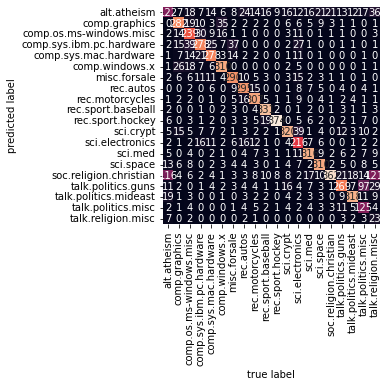

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# report the confusion matrix
print(confusion_matrix(y_test, y_test_pred))

#  apply the model to the training data, and predict labels for the test data
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=newsgroups_test.target_names, yticklabels=newsgroups_test.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# reference: Tutorial 8 Data_Simulation.ipynb

c) Using the same trained model in (a) apply appropriate sklearn method to build a multi-label classifier. Predict the top 2 labels for atleast 10 samples taken from the test subset.

In [ ]:
import numpy as np

# predict 10 samples taken from the test subset and get the probability of each label
probability = clf.predict_proba(X_test[0:10])

# get the top 2 labels by comparing the probability
top = (np.argsort(probability, axis=1)[:,-2:])

# get the labels
xticklabels=newsgroups_test.target_names

for i in range(0, 10):
  label = []
  for j in range(0, 2):
    label.append(xticklabels[top[i][j]])

  # print the predicted label in each instance
  print("Test instance: ", i + 1)
  print("Predicted labels: ", label[0], ", ", label[1], "\n")


Test instance:  1
Predicted labels:  rec.autos ,  comp.sys.mac.hardware 

Test instance:  2
Predicted labels:  comp.windows.x ,  comp.graphics 

Test instance:  3
Predicted labels:  talk.religion.misc ,  soc.religion.christian 

Test instance:  4
Predicted labels:  alt.atheism ,  talk.politics.mideast 

Test instance:  5
Predicted labels:  talk.religion.misc ,  alt.atheism 

Test instance:  6
Predicted labels:  soc.religion.christian ,  sci.med 

Test instance:  7
Predicted labels:  alt.atheism ,  soc.religion.christian 

Test instance:  8
Predicted labels:  sci.electronics ,  comp.os.ms-windows.misc 

Test instance:  9
Predicted labels:  comp.graphics ,  comp.windows.x 

Test instance:  10
Predicted labels:  comp.os.ms-windows.misc ,  comp.graphics 



## **2. Clustering**

In this question we are going to explore two different clustering methods on the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/seeds) and evaluate it using two measures: one is an intrinsic measure (no labels), while the other one makes use of the available labels.


In [ ]:
# input data
from sklearn import datasets

wine = datasets.load_wine()

X = wine.data # 178 instances, 13 features
y = wine.target # target, 3 classes 

**a**) Cluster the dataset using the [Agglomerative Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), and [k-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) clustering algorithm without using the class information as part of the features. Experiment with different numbers of clusters ranging from 2 to 5. 



In [ ]:
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans, AgglomerativeClustering
ac_rng = range(2,6)
ssee = []

# use Agglomerative Clustering to cluster the data with the required number - from 2 to 5
for ac in ac_rng:
  model = AgglomerativeClustering(n_clusters=ac)
  labels = model.fit_predict(X)
  ssee.append(labels)
print("Agglomerative Clustering")
ssee


Agglomerative Clustering


[array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
        0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
        1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
        2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
        1, 1, 1, 1, 1,

In [ ]:

k_rng = range(2,6)
sse = []
# use K-Means to cluster the data with the required number - from 2 to 5
for k in k_rng:
  km = cluster.KMeans(n_clusters=k)
  labels = km.fit_predict(X)
  sse.append(labels)

print("K-Means")
sse


K-Means


[array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1], dtype=int32),
 array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
        1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
        0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
        2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
        0

b) What is the variability of the resulting clusters as a function of different initializations or parameterization? Use the Silhouette coefficient and Adjusted Rand Index as metrics for evaluation to discuss the stability of results.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

print("K-Means")
for cluster in [2, 3, 4, 5]:
  model = KMeans(n_clusters=cluster)
  model.fit(X)
  k_pred = model.predict(X)
  print("Cluster =", cluster)
  print("Silhouette Score: ", silhouette_score(X, k_pred)) # calculate the silhouette_score
  print("Adjuect rand score: ", adjusted_rand_score(y, k_pred), "\n") #  calculate the adjusted_rand_score

print("Agglomerative Clustering")
for cluster in [2, 3, 4, 5]:
  model = AgglomerativeClustering(n_clusters=cluster)
  a_pred = model.fit_predict(X)
  print("Cluster =", cluster)
  print("Silhouette Score: ", silhouette_score(X, a_pred)) # calculate the silhouette_score
  print("Adjuect rand score: ", adjusted_rand_score(y, a_pred), "\n") #  calculate the adjusted_rand_score

K-Means
Cluster = 2
Silhouette Score:  0.6568536504294317
Adjuect rand score:  0.3694075388574537 

Cluster = 3
Silhouette Score:  0.5711381937868838
Adjuect rand score:  0.37111371823084754 

Cluster = 4
Silhouette Score:  0.560594106006062
Adjuect rand score:  0.30289726650864374 

Cluster = 5
Silhouette Score:  0.5489993239795675
Adjuect rand score:  0.31158801033176253 

Agglomerative Clustering
Cluster = 2
Silhouette Score:  0.6587292996216912
Adjuect rand score:  0.3266191752729725 

Cluster = 3
Silhouette Score:  0.5644796401732068
Adjuect rand score:  0.36840191587483156 

Cluster = 4
Silhouette Score:  0.560672694839426
Adjuect rand score:  0.2818746939706753 

Cluster = 5
Silhouette Score:  0.5074843044233786
Adjuect rand score:  0.21533322459795182 



c) Based on the Silhouette coefficient, discuss (i) which clustering method you would pick, (ii) how many clusters you would use for your data.

Make sure that appropriate visualizations are used to support the analysis.


(i)From the output above, we can find that the Silhouette Score and the Adjuect rand score between K-Means and Agglomerative Clustering are kiterally the same. So, both clustering methods are fine. </br>
(ii)For the number of cluster is 2, it has the best Silhouette Score and the Adjuect rand score. So, I will use 2 clusters for the data.

## **3. Gaussian Mixture Model**



It’s year 2120 and you work as a space taxi driver. One day, you suddenly get lost and find a
new small inhabited planet, which looks like a so far unknown civilization. You meet the planet
prime minister who explains to you that different alien races joined to live on this planet
peacefully. Although the different races look similar, the prime minister explains: “It’s not
clear-cut, but the race can be fairly well distinguished by looking at an alien's height and weight”.
You spent a good amount of time chatting and laughing with the prime minister until you
realized that you had passengers waiting to be picked up.

A few years later, you find that there is a lot of interest in knowing more about this planet, how
many races there are, and what their different races look like. You never managed to find that
planet again (as you know, planets move around). You are clearly not good at memorizing data,
but luckily, the prime minister shared with you the last census data (aliens.csv), which contains
aliens’ heights and weights in meters and kilograms, respectively. Would you be able to infer
how many races there are and what their characteristics are?

a) Run a Gaussian Mixture Model, so that you can identify the different races in the civilization.
Vary the number of components from 2 to 7. Use the [Akaike information criterion](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.aic) (AIC) to
provide a metric of the goodness of the approximation for each. Indicate the most likely number
of races.

In [ ]:
# Load data
import pandas as pd
from google.colab import files
import io


# Upload file (Tutorial 1)
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['aliens.csv']), header=None)

Saving aliens.csv to aliens (2).csv


number of components:  2 , SILHOUETTE:  0.6318389620124378
number of components:  3 , SILHOUETTE:  0.504177272792336
number of components:  4 , SILHOUETTE:  0.487448511225874
number of components:  5 , SILHOUETTE:  0.4072640570055382
number of components:  6 , SILHOUETTE:  0.26388080627351435
number of components:  7 , SILHOUETTE:  0.1796056993336692


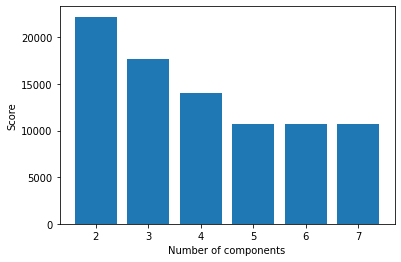

In [ ]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

# Vary the number of components from 2 to 7
races = [2, 3, 4, 5, 6, 7]
score = []

# add each score with the special number of components to the list
for race in races:
  gm = GaussianMixture(n_components=race, random_state=0).fit(df)
  score.append(gm.aic(df))
  cluster = gm.predict(df)

  # calculate the silhouette_score
  print("number of components: ", race, ", SILHOUETTE: ", silhouette_score(df, cluster))

plt.bar(races, score)
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.show()

b) Using the most probable number of races (# gaussians) based on AIC, plot in a scatter plot of
all your points (heights and weights) where the color of each point is defined by the Gaussian
with the highest posterior probability.

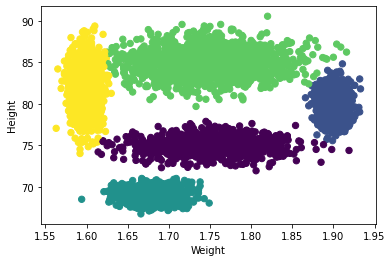

In [ ]:

# from the graph in a, we can find the most probable number of races is 5
model = GaussianMixture(n_components=5)
model.fit(df)
labels = model.predict(df)


# first column as height
height = df[0]

# second column as weight
weight = df[1]


plt.scatter(height, weight, c=labels, s=40, cmap= "viridis")
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

C) Compare and contrast the above method with [Bayesian Gaussian Mixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html) Model of sklearn starting with the default parameters, and experimenting as needed.

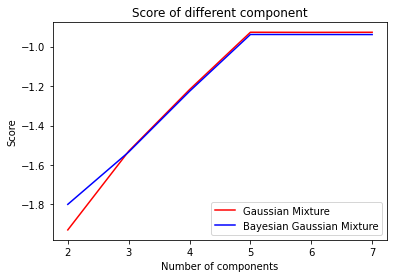

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

# Vary the number of components from 2 to 7
races = [2, 3, 4, 5, 6, 7]
gm_score = []
bgm_score = []

# add each score with the special number of components to the list
for race in races:
  bgm = BayesianGaussianMixture(n_components=race, random_state=0).fit(df)

  # calculate the score
  bgm_score.append(bgm.score(df))

for race in races:
  gm = GaussianMixture(n_components=race, random_state=0).fit(df)

  # calculate the score
  gm_score.append(gm.score(df))

plt.title("Score of different component")
plt.plot(races, gm_score, label = "Gaussian Mixture", color = "red")
plt.plot(races, bgm_score, label = "Bayesian Gaussian Mixture", color = "blue")
plt.xlabel("Number of components")
plt.ylabel("Score")
plt.legend()
plt.show()
